In [6]:
import sys 
import os
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

In [7]:
pwd

'/Users/colada/work_dir/Helvetas/helvetas/notebooks'

In [8]:
datapath   = "/Users/colada/work_dir/Hack4Good/data/"
filename   = "Helvetas_H4G2020.csv"
# filename2  = "Swiss_age_distribution_2019.csv"
file_path  = "{}{}".format(datapath, filename)
# file_path2 = "{}{}".format(datapath, filename2)

df          = pd.read_csv(file_path, sep = ";")
# df_swiss_pop = pd.read_csv(file_path2, sep = ",")

In [9]:
df_birth    = df.assign(**{"first_donation_year": df.apply(lambda x: int(x["first_donation"][0:4]), axis = 1),
                          "database_year" : df.apply(lambda x: int(x["andat"][0:4]), axis = 1),
                          "last_donation_year": df.apply(lambda x: int(x["last_donation"][0:4]), axis = 1)}).loc[df.gebjah != 0]
df_birth_cl = df_birth.loc[df_birth.gebjah >=1900]

In [10]:
df_birth_processed = df_birth_cl.assign(**{"first_donate_age":  df_birth_cl.first_donation_year - df_birth_cl.gebjah,
                                           "last_donate_age": df_birth_cl.last_donation_year - df_birth_cl.gebjah})
df_birth_corr      = df_birth_processed.loc[df_birth_processed.gebjah<=df_birth_processed.first_donation_year]

In [1]:
#first_donation_year before the birth year #
df_birth_processed.loc[df_birth_processed.gebjah>=df_birth_processed.first_donation_year]


In [11]:
#birth year: stratification#
# <1952      Reconstructor 
# 1952-1966  baby boomers
# 1967-1980  Gen X
# 1981- 1994 Gen Y 
# > 1995     Gen Z 
df_reconstructor = df_birth_corr.loc[df_birth_corr.gebjah <= 1951]
df_boomer        = df_birth_corr.loc[(df_birth_corr.gebjah >= 1952) & (df_birth_corr.gebjah <= 1966)]
df_genX          = df_birth_corr.loc[(df_birth_corr.gebjah >= 1967) & (df_birth_corr.gebjah <= 1980)]
df_genY          = df_birth_corr.loc[(df_birth_corr.gebjah >= 1981) & (df_birth_corr.gebjah <= 1994)]
df_genZ          = df_birth_corr.loc[df_birth_corr.gebjah >= 1995]

df_list = [df_reconstructor, df_boomer, df_genX, df_genY, df_genZ]

In [12]:
df_birth_corr.columns

Index(['adrnum', 'quelle', 'sprachcd', 'gescode', 'vname', 'land', 'plz',
       'ort', 'kanton', 'gebjah', 'andat', 'qty_donations', 'LTV_donations',
       'AVG_donation', 'first_donation', 'last_donation', 'active_member',
       'has_been_member', 'first_donation_year', 'database_year',
       'last_donation_year', 'first_donate_age', 'last_donate_age'],
      dtype='object')

(array([9.0697e+04, 2.3000e+01, 1.2000e+01, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000000e-01, 1.700090e+03, 3.400080e+03, 5.100070e+03,
        6.800060e+03, 8.500050e+03, 1.020004e+04, 1.190003e+04,
        1.360002e+04, 1.530001e+04, 1.700000e+04]),
 <a list of 10 Patch objects>)

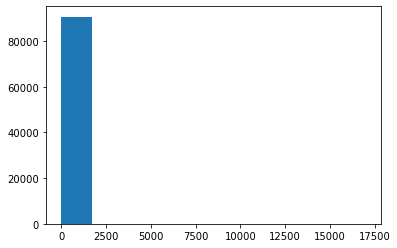

In [13]:
plt.hist(df_birth_corr.AVG_donation)

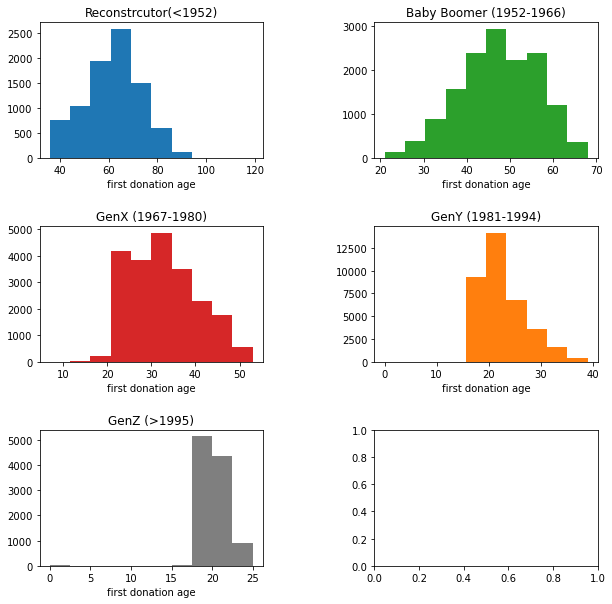

In [14]:
gen_names = ['Reconstrcutor(<1952)', 'Baby Boomer (1952-1966)', 'GenX (1967-1980)', 'GenY (1981-1994)', 
         'GenZ (>1995)']
color = ["tab:blue", "tab:green", "tab:red", "tab:orange", "tab:grey"]
fig, axs = plt.subplots(3,2, figsize = (10,10),
                       gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

df_idx = 0
for i in range(0,3):
    for j in range(0,2):
        if df_idx >=5:break
        axs[i,j].hist(df_list[df_idx].first_donate_age, color = color[df_idx])
        axs[i,j].set_title("{}".format(gen_names[df_idx]))
        axs[i,j].set_xlabel("first donation age")
        df_idx += 1
       
        

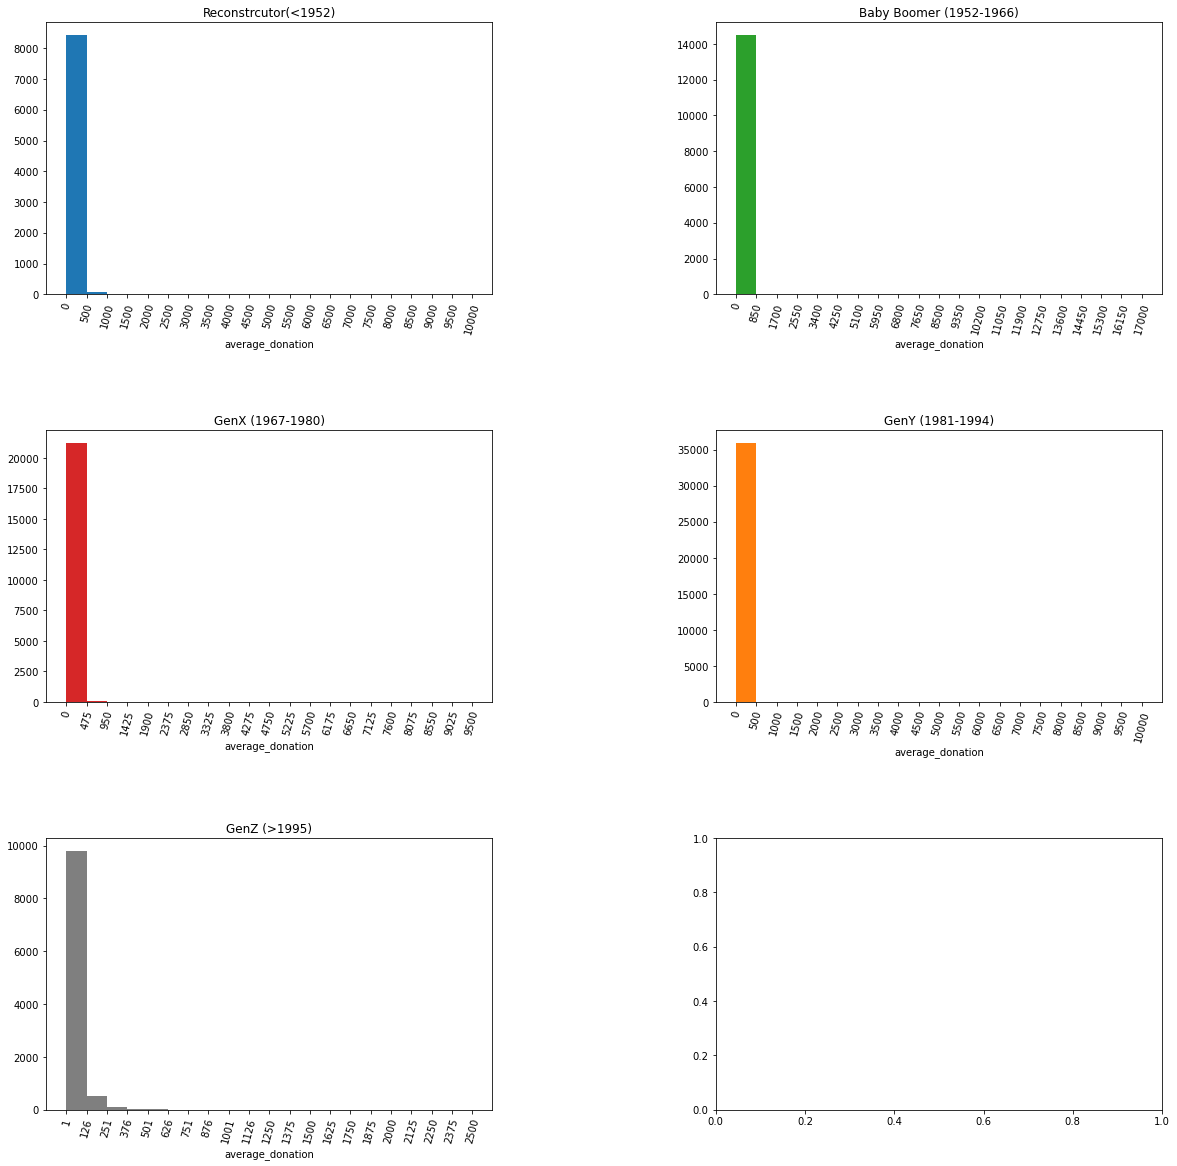

In [56]:
gen_names = ['Reconstrcutor(<1952)', 'Baby Boomer (1952-1966)', 'GenX (1967-1980)', 'GenY (1981-1994)', 
         'GenZ (>1995)']
color = ["tab:blue", "tab:green", "tab:red", "tab:orange", "tab:grey"]
fig, axs = plt.subplots(3,2, figsize = (20,20),
                       gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

df_idx = 0
for i in range(0,3):
    for j in range(0,2):
        if df_idx >=5:break
        hist, bins = np.histogram(df_list[df_idx].AVG_donation, bins = 20)
        axs[i,j].hist(df_list[df_idx].AVG_donation, bins = 20, color = color[df_idx])
        axs[i,j].set_title("{}".format(gen_names[df_idx]))
        axs[i,j].set_xlabel("average_donation")
        axs[i,j].set_xticks(bins)
        axs[i,j].set_xticklabels(np.int64(np.around(bins)), rotation = 75)
        df_idx += 1
       
        

In [2]:
df_birth_corr.loc[df_birth_corr.first_donate_age<=10]

In [17]:
# df_new = df_birth_corr
# df_new["year"] = df_new.apply(lambda x: "{}"x.last_donation, axis =1)

/Users/colada/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/colada/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<ipython-input-18-5999770a04c4>:32: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two 

AttributeError: 'AxesSubplot' object has no attribute 'show'

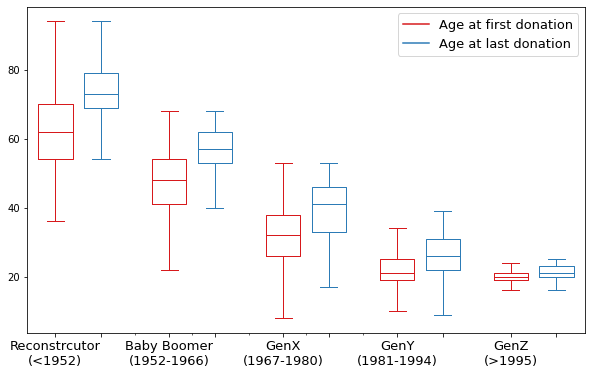

In [18]:
data_first_age = []
data_last_age  = []
for i, df_gen in enumerate (df_list):
    data_first_age.append(df_gen.first_donate_age.tolist())
    data_last_age.append(df_gen.last_donate_age.tolist())

# data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
# data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

ticks = ['Reconstrcutor\n(<1952)', 'Baby Boomer\n(1952-1966)', 'GenX\n(1967-1980)', 'GenY\n(1981-1994)', 
         'GenZ\n(>1995)']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig, ax = plt.subplots(figsize = (10,6))

bfa = ax.boxplot(data_first_age, positions=np.array(range(len(data_first_age)))*2.0-0.4, sym='', widths=0.6)
bla = ax.boxplot(data_last_age, positions=np.array(range(len(data_last_age)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bfa, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bla, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Age at first donation')
plt.plot([], c='#2C7BB6', label='Age at last donation')
plt.legend(fontsize = 13)


ax.set_xticks(np.arange(len(ticks))+1, ticks)
ax.set_xticklabels(ticks,fontsize = 13 )
ax.show()
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)


Text(0, 0.5, 'birth year')

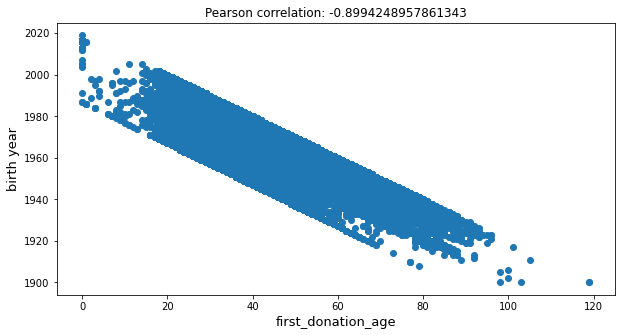

In [19]:
#correlation between birthyear and first donate
#correlated, saying predicting both are fine

from scipy.stats import spearmanr,pearsonr
fig, ax = plt.subplots(figsize = (10,5))
plt.scatter(df_birth_corr.first_donate_age, df_birth_corr.gebjah)
plt.title("Pearson correlation: {}".format(pearsonr(df_birth_corr.first_donate_age, df_birth_corr.gebjah)[0]))
plt.xlabel("first_donation_age", fontsize = 13)
plt.ylabel("birth year", fontsize = 13)

In [20]:
#find #
df_birth_non   = df.assign(**{"first_donation_year": df.apply(lambda x: int(x["first_donation"][0:4]), axis = 1),
                          "database_year" : df.apply(lambda x: int(x["andat"][0:4]), axis = 1),
                          "last_donation_year": df.apply(lambda x: int(x["last_donation"][0:4]), axis = 1)}).loc[df.gebjah==0]

In [21]:
#take out numeric columns for visualization#
col_numeric   = []
col_nonumeric = []
for i in df_birth_non.columns:
    if df_birth_non[i].dtype == "int64" or df_birth_non[i].dtype == "float64":
        if i in ["adrnum","gebjah"] :continue
        col_numeric.append(i)
    else:
        col_nonumeric.append(i)
        


Text(0.5, 0.9, 'Distribution of numerical features')

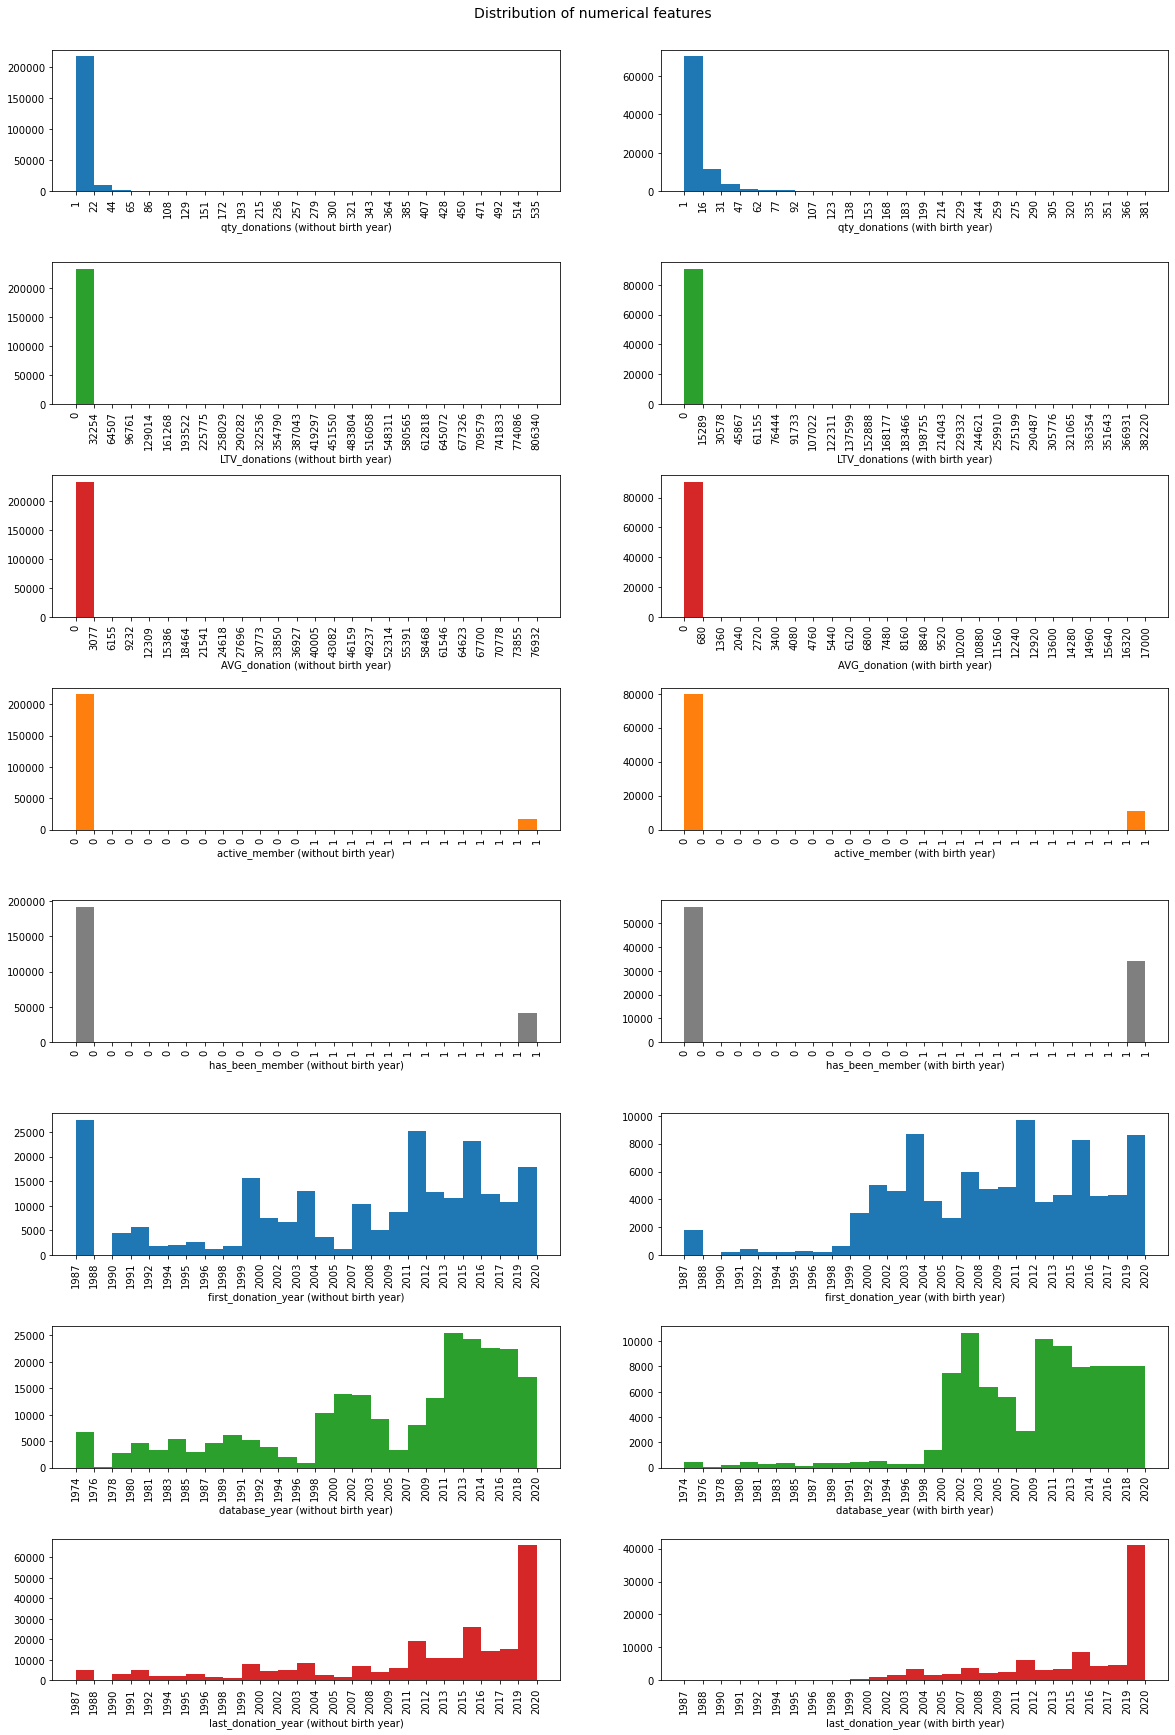

In [46]:
#visualize feature difference between birth non/available donors #
fig, axs = plt.subplots(len(col_numeric), 2, figsize = (20,30),
                        gridspec_kw={'hspace': 0.5, 'wspace': 0.2})
color = ["tab:blue", "tab:green", "tab:red", "tab:orange", "tab:grey",
        "tab:blue", "tab:green", "tab:red", "tab:orange", "tab:grey"]


for i,j in enumerate(col_numeric):
    hist1, bins1 = np.histogram(df_birth_non[j], bins=25)
    hist2, bins2 = np.histogram(df_birth_corr[j], bins =25)
    axs[i,0].hist(df_birth_non[j], bins = 25, color = color[i])
    axs[i,1].hist(df_birth_corr[j], bins = 25, color= color[i])    
    axs[i,0].set_xlabel("{} (without birth year)".format(j))
    axs[i,1].set_xlabel("{} (with birth year)".format(j))
    axs[i,0].set_xticks(bins1)
    axs[i,1].set_xticks(bins2)
    axs[i,0].set_xticklabels(np.int64(np.around(bins1, decimals = 0)), rotation = 90)
    axs[i,1].set_xticklabels(np.int64(np.around(bins2, decimals = 0)), rotation = 90)

fig.suptitle("Distribution of numerical features", y = 0.90, fontsize = 14)

# fig.subplots_adjust(top=0.88)    


Text(0.5, 0.9, 'Distribution of features')

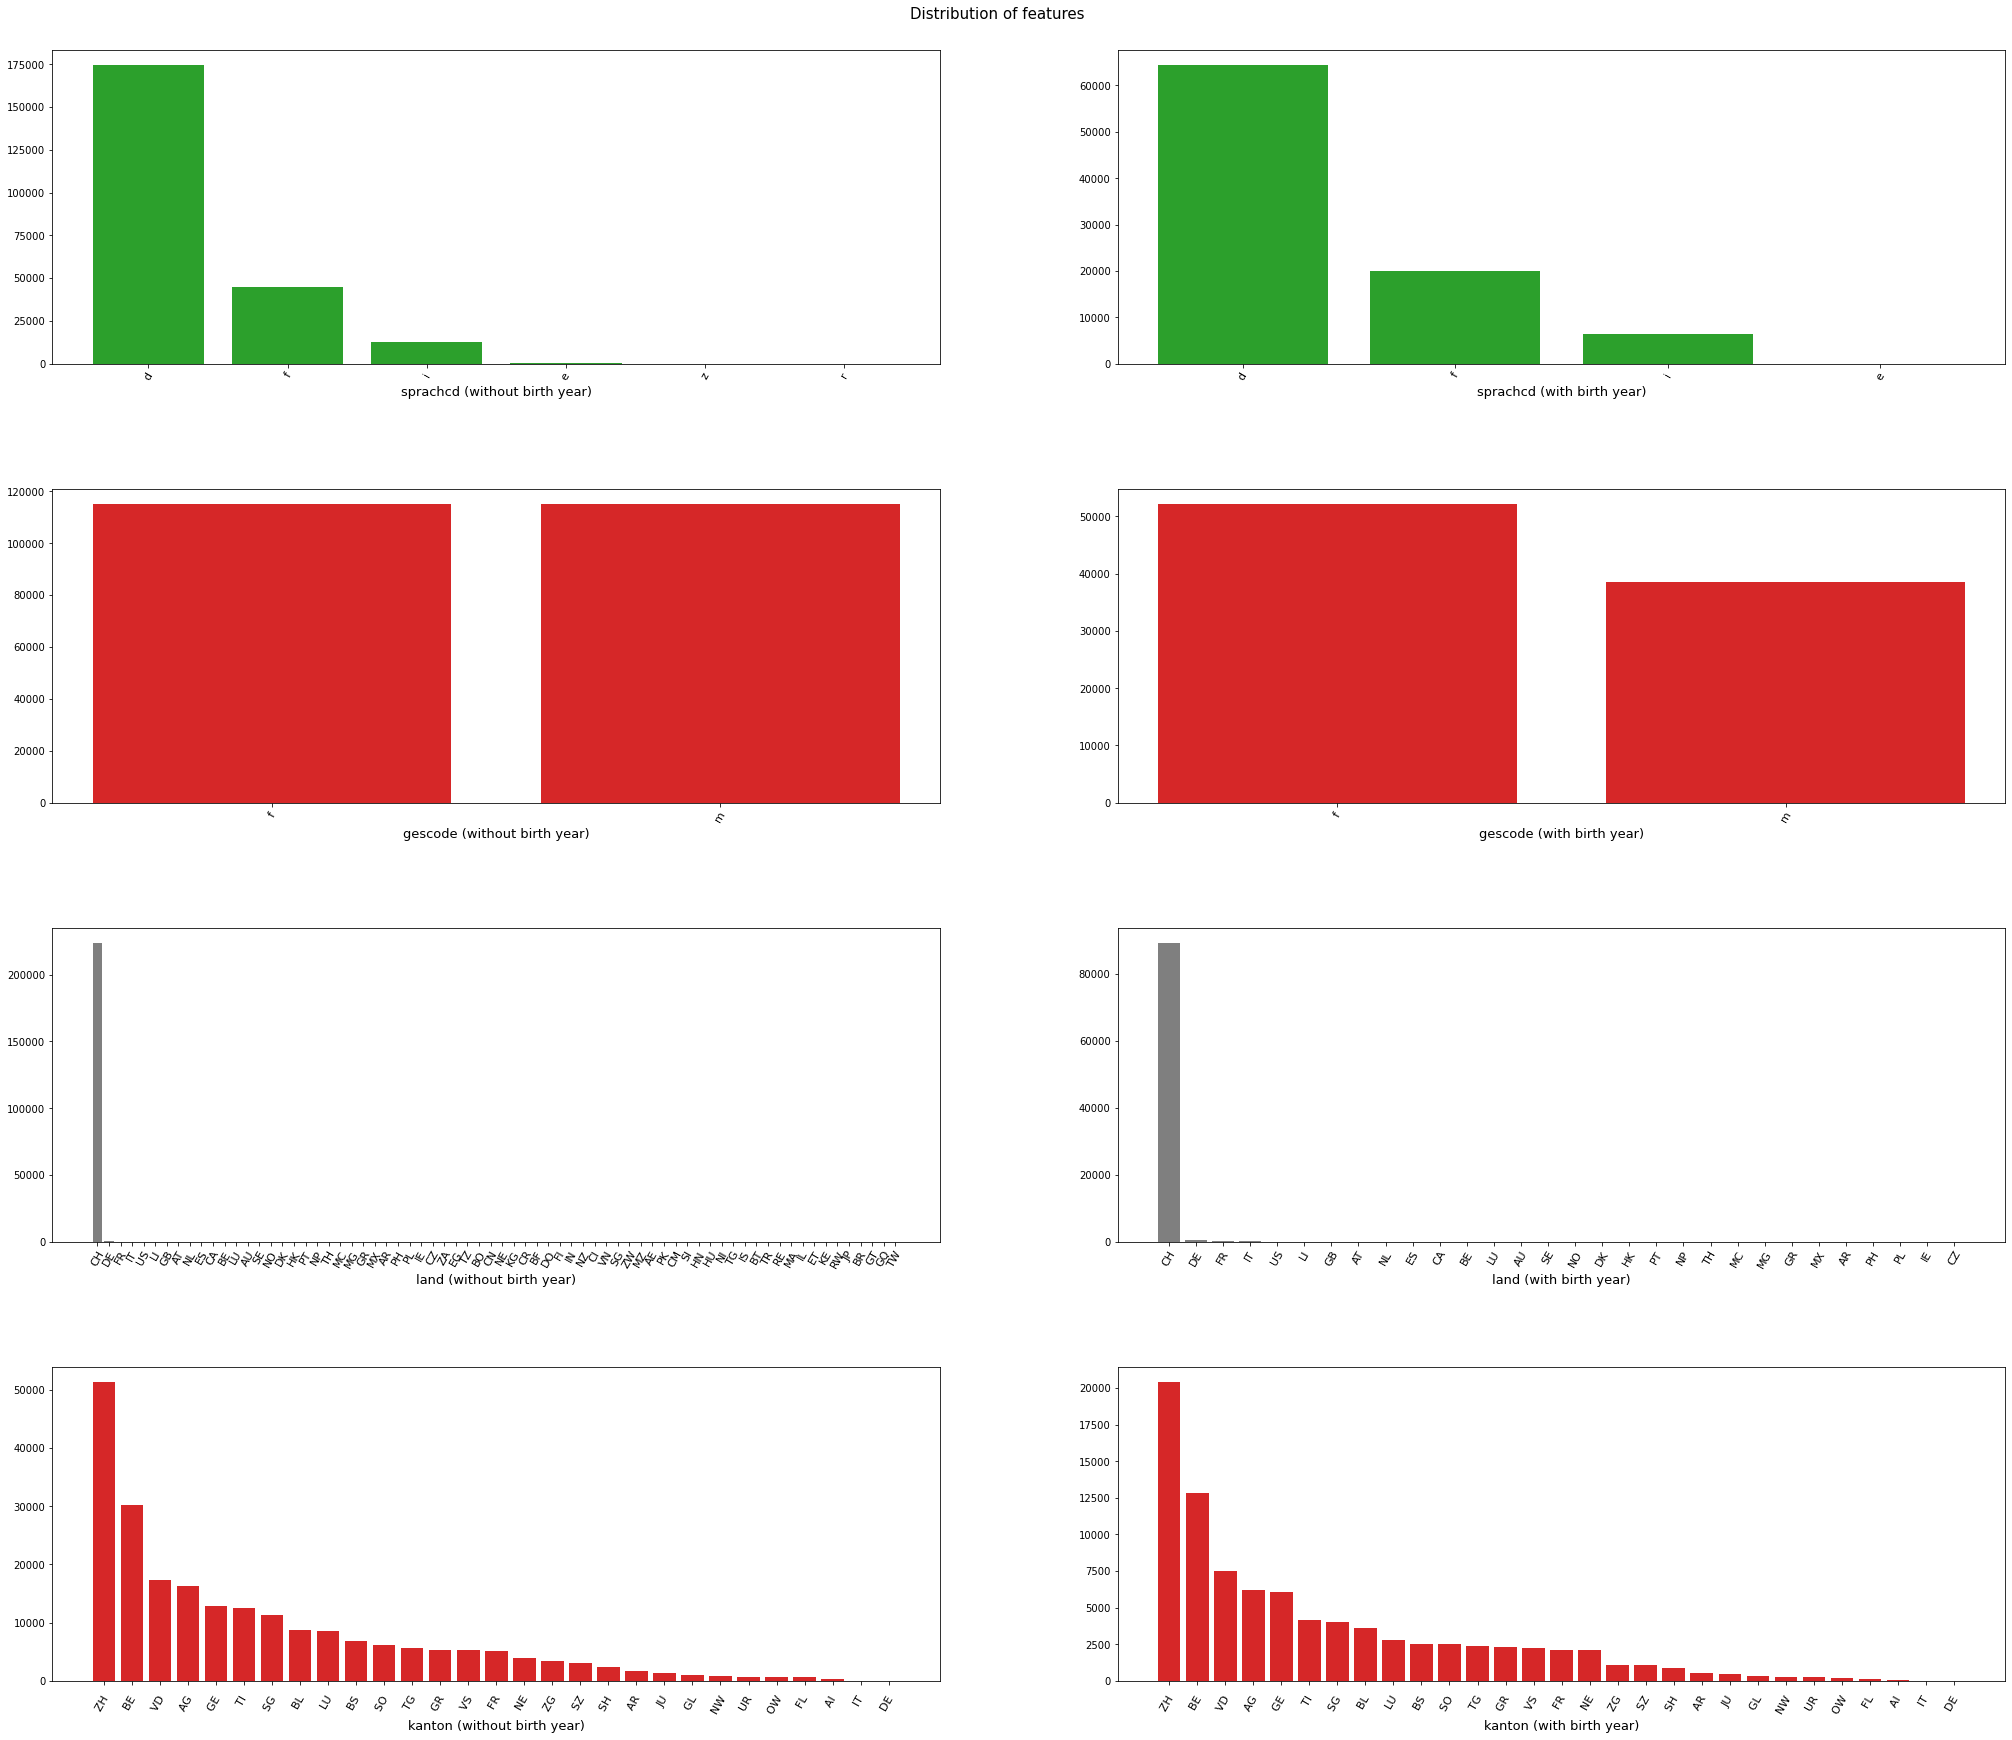

In [23]:
#visualize feature difference between birth non/available donors #
fig, axs = plt.subplots(4, 2, figsize = (35,30),
                        gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
color = ["tab:blue", "tab:green", "tab:red", "tab:orange", "tab:grey",
        "tab:blue", "tab:green", "tab:red", "tab:orange", "tab:grey"]

idx = 0
for i,j in enumerate(col_nonumeric):
#     if j in ["first_donation", "last_donation"]: continue
    cnts  = pd.DataFrame(df_birth_non[j].value_counts())
    cnts1 = pd.DataFrame(df_birth_corr[j].value_counts())
    
    if cnts.shape[0] <= 300:
        if j == "quelle":continue
        
        axs[idx,0].bar(cnts.index, cnts[j], color = color[i])
        axs[idx,1].bar(cnts1.index, cnts1[j], color = color[i])
        axs[idx,0].set_xlabel("{} (without birth year)".format(j), fontsize = 13)
        axs[idx,1].set_xlabel("{} (with birth year)".format(j), fontsize = 13)
        axs[idx,0].set_xticklabels(cnts.index, rotation = "60", fontsize = 11)
        axs[idx,1].set_xticklabels(cnts.index, rotation = "60",fontsize = 11)
        idx +=1 
    
fig.suptitle("Distribution of features", y = 0.90, fontsize = 15)

# fig.subplots_adjust(top=0.88)    

In [47]:
df_birth_non.quelle.value_counts()

m                      54480
FTML                   16016
f3-erm                  5158
f8-era                  4825
f5-erm                  4250
                       ...  
2017_Cinema_Sud_D          1
f4-kb                      1
2018_FilmandFood GR        1
f                          1
imp2007                    1
Name: quelle, Length: 260, dtype: int64

[Text(0, 0, 'corr'),
 Text(0, 0, 'm'),
 Text(0, 0, 'FTML'),
 Text(0, 0, 'mmove'),
 Text(0, 0, '2020_Corris'),
 Text(0, 0, 'msource'),
 Text(0, 0, 'f3-erm'),
 Text(0, 0, '2019_Corris'),
 Text(0, 0, 'f11-era'),
 Text(0, 0, 'f5-erm'),
 Text(0, 0, 'f8-era'),
 Text(0, 0, 'f12-dsf'),
 Text(0, 0, 'f14-dsf'),
 Text(0, 0, 'f12-erm'),
 Text(0, 0, 'f19-em'),
 Text(0, 0, '2012_Onlinewettbewerb'),
 Text(0, 0, 'f27-sch'),
 Text(0, 0, 'f28-sch'),
 Text(0, 0, 'f31-ws'),
 Text(0, 0, 'f27-rl'),
 Text(0, 0, 'f18-em'),
 Text(0, 0, 'f26-sch'),
 Text(0, 0, 'f34-ws'),
 Text(0, 0, 'f35-rl'),
 Text(0, 0, 'f15-ath'),
 Text(0, 0, 'f31-rl'),
 Text(0, 0, 'f2-erm'),
 Text(0, 0, 'f27-ws'),
 Text(0, 0, '2015_petition_Etatkürzung'),
 Text(0, 0, 'f30-ws'),
 Text(0, 0, 'f30-rl'),
 Text(0, 0, 'f17-em'),
 Text(0, 0, '2013_Fairshop_Wettbewerb'),
 Text(0, 0, 'f25-ws'),
 Text(0, 0, 'f28-ws'),
 Text(0, 0, 'f14-erm'),
 Text(0, 0, 'f15-kb'),
 Text(0, 0, 'f25-sch'),
 Text(0, 0, 'superm'),
 Text(0, 0, 'f17-ws'),
 Text(0, 0, 'f26-

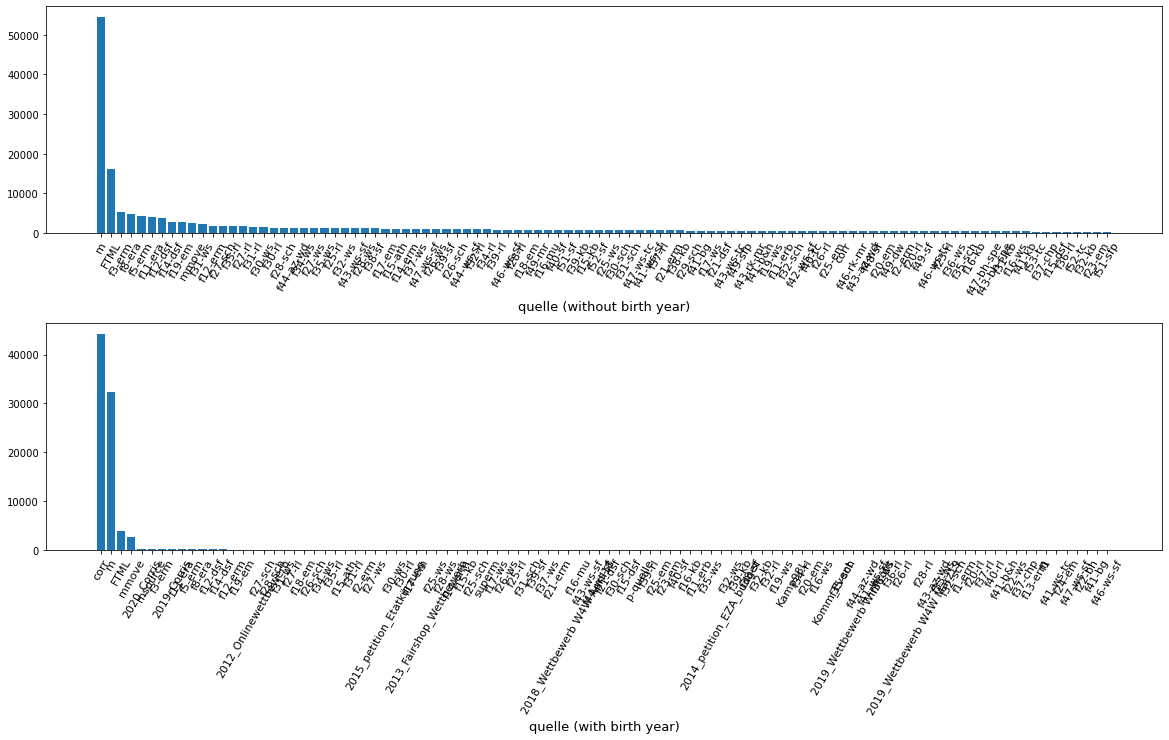

In [49]:
col_name = "quelle"
x = np.arange(100)
fig, ax = plt.subplots(2,1, figsize = (20,10),
                      gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
df_cnt   = pd.DataFrame(df_birth_non.quelle.value_counts()).iloc[0:100,]
df_cnt1 = pd.DataFrame(df_birth_corr.quelle.value_counts()).iloc[0:100,]

ax[0].bar(x, df_cnt[col_name])
ax[1].bar(x, df_cnt1[col_name])
ax[0].set_xlabel("{} (without birth year)".format(col_name), fontsize = 13)
ax[1].set_xlabel("{} (with birth year)".format(col_name), fontsize = 13)
ax[0].set_xticks(x)
ax[1].set_xticks(x)
ax[0].set_xticklabels(df_cnt.index.tolist(), rotation = "60", fontsize = 11)
ax[1].set_xticklabels(df_cnt1.index.tolist(), rotation = "60",fontsize = 11)


In [50]:
df_birth_corr.vname.isna().value_counts()

False    90733
True         5
Name: vname, dtype: int64